#### Урок 7. Многомерный статистический анализ. Линейная регрессия

##### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
##### Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [3]:
X = zp.reshape((len(zp), 1))
Y = ks.reshape((len(ks), 1))

X_intercept = np.hstack([np.ones((len(X), 1)), X])
X_intercept

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [4]:
B_intercept = np.dot(np.linalg.inv(np.dot(X_intercept.T, X_intercept)), X_intercept.T@Y)
B_intercept

array([[444.17735732],
       [  2.62053888]])

In [5]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@Y)
B

array([[5.88982042]])

##### y = 444,1774 + 2,6205x - с intercept
##### y = 5,8898x - без intercept

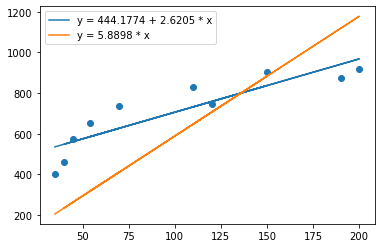

In [6]:
plt.scatter(X,Y)
plt.plot(X, B_intercept[0,0] + B_intercept[1,0] * X, label='y = 444.1774 + 2.6205 * x')
plt.plot(X, B[0,0] * X, label='y = 5.8898 * x')
plt.legend()
plt.show()

##### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [7]:
X, Y = zp, ks
n = len(Y)
B1 = 0.1
alpha = 1e-6

In [8]:
def mse_function (B1, Y=Y, X=X, n=n):
  return np.sum((Y-B1*X)**2)/n

In [9]:
def mse_derivative (B1, Y=Y, X=X, n=n):
  return -2*np.sum((Y-B1*X)*X)/n

In [10]:
for i in range(700):
  B1 -= alpha*(2/n)*np.sum((Y-B1*X)*(-1)*X)
  if i%30==0:
    print(f'B1={B1}, MSE={mse_function(B1)}, MSE_der={mse_derivative(B1)}')

B1=0.25952808, MSE=493237.7212546963, MSE_der=-155132.57090614398
B1=3.4547782236263824, MSE=138204.25062502263, MSE_der=-67093.20464877757
B1=4.836690291080364, MSE=71796.25222021657, MSE_der=-29017.105071804508
B1=5.434352720103083, MSE=59374.825462025976, MSE_der=-12549.592632455746
B1=5.692835432193034, MSE=57051.433003054815, MSE_der=-5427.5667696988985
B1=5.804626485478126, MSE=56616.849068093856, MSE_der=-2347.3655203240974
B1=5.852974939784972, MSE=56535.56138215128, MSE_der=-1015.2108891167085
B1=5.873885137561711, MSE=56520.35675226433, MSE_der=-439.06802773466916
B1=5.882928578088004, MSE=56517.512769595625, MSE_der=-189.89230222560946
B1=5.8868397709626885, MSE=56516.98081074626, MSE_der=-82.12642271085133
B1=5.888531320728348, MSE=56516.88130936019, MSE_der=-35.518813707677324
B1=5.889262898203911, MSE=56516.862697909644, MSE_der=-15.361513208007091
B1=5.889579297764605, MSE=56516.85921669088, MSE_der=-6.643692832276429
B1=5.889716137245525, MSE=56516.858565538845, MSE_der

##### B1=5.889820396256308, y = 5.889820396256308x

##### *3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [16]:
X, y = zp, ks
n = len(y)
np.random.seed(42)
B0 = np.random.randn(1)
B1 = np.random.randn(1)

epochs = 2000000
alpha = 5e-5

In [17]:
def mse_function_intercept(B0, B1, y=y, X=X, n=n):
  return np.sum((y-B0-B1*X)**2)/n

def mse_derivative_B0_intercept(B0, B1, y=y, X=X, n=n):
  return [-2*np.sum((y-B0-B1*X))/n]

def mse_derivative_B1_intercept(B0, B1, y=y, X=X, n=n):
  return [-2*np.sum((y-B0-B1*X)*X)/n]

In [18]:
for i in range(1400000):
  B0 -= alpha*(2/n)*np.sum((y-B0-B1*X)*(-1))
  B1 -= alpha*(2/n)*np.sum((y-B0-B1*X)*(-1)*X)
  if i%200000==0:
    print(f'B0={B0}, B1={B1}, MSE={mse_function_intercept(B0, B1)}, mse_der_B0={mse_derivative_B0_intercept(B0, B1)}, mse_der_B1={mse_derivative_B1_intercept(B0, B1)}')

B0=[0.56905648], B1=[8.16061666], MSE=127690.26150363192, mse_der_B0=[236.31117227169608], mse_der_B1=[62683.10770051738]
B0=[441.39996253], B1=[2.64098122], MSE=6472.3709524663445, mse_der_B0=[-1.4090840305107803], mse_der_B1=[-0.003916893695713952]
B0=[444.15996894], B1=[2.62066687], MSE=6470.414277873725, mse_der_B0=[-0.0088218252853153], mse_der_B1=[-2.4522418243577704e-05]
B0=[444.17724846], B1=[2.62053968], MSE=6470.414201179667, mse_der_B0=[-5.523063146597451e-05], mse_der_B1=[-1.5352779882960022e-07]
B0=[444.17735664], B1=[2.62053889], MSE=6470.414201176661, mse_der_B0=[-3.457820014318713e-07], mse_der_B1=[-9.626091923564673e-10]
B0=[444.17735732], B1=[2.62053888], MSE=6470.414201176657, mse_der_B0=[-2.208435034845024e-09], mse_der_B1=[-5.093170329928398e-12]
B0=[444.17735732], B1=[2.62053888], MSE=6470.414201176658, mse_der_B0=[-5.684000825567636e-10], mse_der_B1=[-0.0]
